In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('data/heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [72]:
len(df.columns)

14

In [74]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=20)

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,Xtrain,ytrain,cv=10)
    knn_scores.append(round(score.mean(),2))

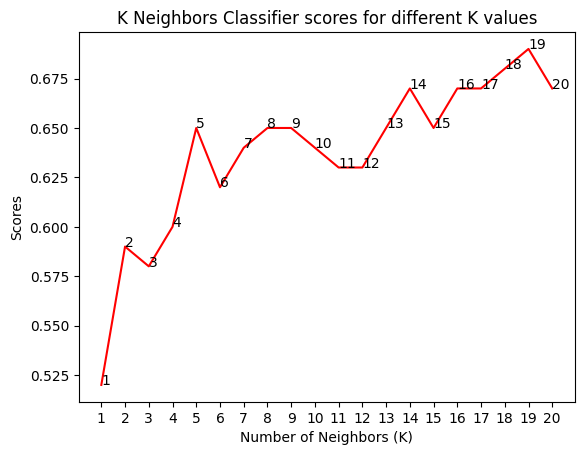

In [78]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [79]:
knn_classifier = KNeighborsClassifier(n_neighbors = 19)
knn_classifier.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=19)

In [80]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

In [81]:
y_pred=knn_classifier.predict(Xtest)

In [82]:
print(precision_score(ytest,y_pred))
print(recall_score(ytest,y_pred))
print(f1_score(ytest,y_pred))
print(roc_auc_score(ytest,y_pred))

0.7714285714285715
0.7105263157894737
0.7397260273972602
0.681350114416476


In [86]:
y=pd.read_csv(r"splitted_data\ytest.csv")

In [90]:
y.values.ravel()

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])